<a href="https://colab.research.google.com/github/deverten/QuizA_Hamoye/blob/master/StageCQuiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
url= "https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv"
elect_df = pd.read_csv(url)
elect_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [2]:
#CHECK FOR COLUMNS WITH MISSING VALUES, OBVIOUSLY IT SHOWS THERE ISN'T ANY COLUMN WITH MISSING VALUES IN THE DATAFRAME:
elect_df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [3]:
elect_df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [4]:
elect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [5]:
elect_df.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')

In [6]:
#More preprocessing
elect_df = elect_df.drop(columns=['stab'])


In [7]:
X = elect_df.drop(columns='stabf')
y = elect_df['stabf']

In [8]:
#Splitting the data into training and testing data sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=1)
y_train.value_counts()


unstable    5092
stable      2908
Name: stabf, dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalised_train_df = scaler.fit_transform(x_train)
normalised_train_df = pd.DataFrame(normalised_train_df, columns = x_train.columns)

In [10]:
x_test = x_test.reset_index(drop=True)
normalised_test_df = scaler.transform(x_test)
normalised_test_df = pd.DataFrame(normalised_test_df, columns=x_test.columns)

In [11]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(normalised_train_df, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, normalised_train_df, y_train, cv=5, scoring='f1_macro')
scores

array([0.8049015 , 0.80345987, 0.80785034, 0.79645688, 0.7835111 ])

In [13]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
new_predictions = log_reg.predict(normalised_test_df)
cnf_mat = confusion_matrix(y_true=y_test, y_pred=new_predictions,labels=['stable','unstable'])

In [14]:
cnf_mat

array([[ 494,  218],
       [ 174, 1114]])

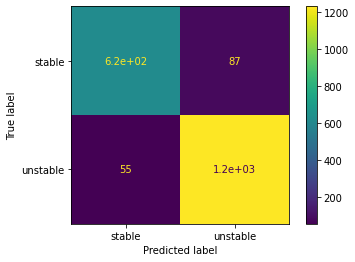

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1)
# fit the model on the whole dataset
model.fit(normalised_train_df,y_train)
plot_confusion_matrix(model, 
                      normalised_test_df, 
                      y_test, 
                      display_labels=["stable", "unstable"])

In [16]:
new_predictions1 = model.predict(normalised_test_df)
cnf_mat1 = confusion_matrix(y_true=y_test, y_pred=new_predictions1,labels=['stable','unstable'])


In [17]:
cnf_mat1

array([[ 625,   87],
       [  55, 1233]])

# **The model evaluation metrics**

In [18]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions1)
accuracy

0.929

In [20]:
precision = precision_score(y_true=y_test, y_pred=new_predictions1, pos_label='stable')
precision

0.9191176470588235

In [21]:
recall = recall_score(y_true=y_test, y_pred=new_predictions1, pos_label='stable')
recall

0.8778089887640449

In [23]:
f1 = f1_score(y_true=y_test, y_pred=new_predictions1, pos_label='stable')
f1

0.8979885057471264

**EXTRA TREE CLASSIFIER**

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=1)
clf.fit(normalised_train_df,y_train)
new_predictions2 = clf.predict(normalised_test_df)
cnf_mat2 = confusion_matrix(y_true=y_test, y_pred=new_predictions2,labels=['stable','unstable'])

In [26]:
cnf_mat2

array([[ 606,  106],
       [  38, 1250]])

**The Model Evaluation Metrics**

In [27]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions2)
accuracy

0.928

In [28]:
precision = precision_score(y_true=y_test, y_pred=new_predictions2, pos_label='stable')
precision

0.9409937888198758

In [29]:
recall = recall_score(y_true=y_test, y_pred=new_predictions2, pos_label='stable')
print('Recall: {}'.format(round(recall*100), 2))

Recall: 85.0


In [30]:
f1 = f1_score(y_true=y_test, y_pred=new_predictions2, pos_label='stable')
print('F1: {}'.format(round(f1*100), 2))

F1: 89.0


**IMPROVING EXTRA TREE**

In [31]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]
hyperparameter_grid = {'n_estimators': n_estimators,'min_samples_leaf': min_samples_leaf,'min_samples_split': min_samples_split,
                       'max_features': max_features}
utility = RandomizedSearchCV(estimator=ExtraTreesClassifier(random_state=1),
                            param_distributions=hyperparameter_grid,random_state=1)
result = utility.fit(normalised_train_df, y_train)

print('Best Score: ', result.best_score_)
print('Best Params: ', result.best_params_)

Best Score:  0.9241249999999999
Best Params:  {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': None}


**The performance Metrics**


In [32]:
#improved Extratree classifier
clfe = ExtraTreesClassifier(random_state=1,n_estimators=1000,min_samples_split=2, min_samples_leaf= 8,max_features= None)
clfe.fit(normalised_train_df,y_train)
new_predictions3 = clfe.predict(normalised_test_df)
cnf_mat3 = confusion_matrix(y_true=y_test, y_pred=new_predictions3,labels=['stable','unstable'])
cnf_mat3

array([[ 619,   93],
       [  53, 1235]])

In [38]:
clfe.feature_importances_

array([0.13723975, 0.1405075 , 0.13468029, 0.13541676, 0.00368342,
       0.00533686, 0.00542927, 0.00496249, 0.10256244, 0.10757765,
       0.11306268, 0.10954089])

In [80]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions3)
accuracy

0.927

In [82]:
precision = precision_score(y_true=y_test, y_pred=new_predictions3, pos_label='stable')
precision

0.9211309523809523

In [83]:
recall = recall_score(y_true=y_test, y_pred=new_predictions3, pos_label='stable')
recall

0.8693820224719101

In [84]:
f1 = f1_score(y_true=y_test, y_pred=new_predictions3, pos_label='stable')
f1

0.8945086705202311

**XGBOOST CLASSIFIER**

In [51]:
from xgboost import XGBClassifier
model3 = XGBClassifier(random_state=1)
model3.fit(normalised_train_df, y_train)
new_predictions4 = model3.predict(normalised_test_df)
cnf_mat4 = confusion_matrix(y_true=y_test, y_pred=new_predictions4, labels=['stable','unstable'])
cnf_mat4


array([[ 603,  109],
       [  52, 1236]])

**MODEL PERFORMANCE METRICS**

In [85]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions4)
accuracy

0.9195

In [53]:
precision = precision_score(y_true=y_test, y_pred=new_predictions4, pos_label='stable')
print('Precision: {}'.format(round(precision*100), 2))

Precision: 92.0


In [54]:
recall = recall_score(y_true=y_test, y_pred=new_predictions4, pos_label='stable')
print('Recall: {}'.format(round(recall*100), 2))

Recall: 85.0


In [55]:
f1 = f1_score(y_true=y_test, y_pred=new_predictions4, pos_label='stable')
print('F1: {}'.format(round(f1*100), 2))

F1: 88.0


**LGBM Classifier**

In [60]:
from lightgbm import LGBMClassifier
model4 = LGBMClassifier(random_state=1)
# fit the model on the whole dataset
model4.fit(normalised_train_df, y_train)
new_predictions5 = model4.predict(normalised_test_df)
cnf_mat5 = confusion_matrix(y_true=y_test, y_pred=new_predictions5,labels=['stable','unstable'])
cnf_mat5


array([[ 635,   77],
       [  48, 1240]])

In [86]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions5)
accuracy

0.9375

In [87]:
precision = precision_score(y_true=y_test, y_pred=new_predictions5, pos_label='stable')
precision

0.9297218155197657

In [88]:
recall = recall_score(y_true=y_test, y_pred=new_predictions5, pos_label='stable')
recall

0.8918539325842697

In [89]:
f1 = f1_score(y_true=y_test, y_pred=new_predictions5, pos_label='stable')
f1

0.910394265232975